In [1]:
import pandas as pd
import numpy as np

In [2]:
data = [["Bob", 5000], ["Rafiq", 6000], ["Nina", 4000], ["Sofia",7500], ["Rohan", 8000], ["Gigi", 7000], ["Elon", 100000000000]]
df = pd.DataFrame(data, columns=["name", "income"])
df

,name,income
0,Bob,5000
1,Rafiq,6000
2,Nina,4000
3,Sofia,7500
4,Rohan,8000
5,Gigi,7000
6,Elon,100000000000


In [3]:
df.describe()

,income
count,7.000000e+00
mean,1.428572e+10
std,3.779644e+10
min,4.000000e+03
25%,5.500000e+03
50%,7.000000e+03
75%,7.750000e+03
max,1.000000e+11


In [4]:
df.income.quantile(0.5)

7000.0

In [5]:
df.income.quantile(0.25)

5500.0

In [6]:
df.income.quantile(1)

100000000000.0

In [7]:
df.income.quantile(0.75)

7750.0

In [8]:
percentile_99 = df.income.quantile(0.99)
percentile_99

94000000479.99995

In [9]:
df_outlier = df[df.income > percentile_99]
df_outlier

,name,income
6,Elon,100000000000


In [10]:
df_no_outlier = df[df.income < percentile_99]
df_no_outlier

,name,income
0,Bob,5000
1,Rafiq,6000
2,Nina,4000
3,Sofia,7500
4,Rohan,8000
5,Gigi,7000


In [11]:
df

,name,income
0,Bob,5000
1,Rafiq,6000
2,Nina,4000
3,Sofia,7500
4,Rohan,8000
5,Gigi,7000
6,Elon,100000000000


In [12]:
df["income"][3] = np.NaN
df

C:\Users\Al hamad\AppData\Local\Temp\ipykernel_4584\4240999731.py:1: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df["income"][3] = np.NaN
C:\Users\Al hamad\AppData\Local\Temp\ipykernel_4584\4240999731.py:1: SettingWithCopyWarning: 
A value

,name,income
0,Bob,5.000000e+03
1,Rafiq,6.000000e+03
2,Nina,4.000000e+03
3,Sofia,NaN
4,Rohan,8.000000e+03
5,Gigi,7.000000e+03
6,Elon,1.000000e+11


In [13]:
df_new = df.fillna(df.income.median())
df_new

,name,income
0,Bob,5.000000e+03
1,Rafiq,6.000000e+03
2,Nina,4.000000e+03
3,Sofia,6.500000e+03
4,Rohan,8.000000e+03
5,Gigi,7.000000e+03
6,Elon,1.000000e+11


### Exercise ###
*Use this air bnb new york city data set and remove outliers using percentile based on price per night for a given apartment/home. You can use suitable upper and lower limits on percentile based on your intuition. Your goal is to come up with new pandas dataframe that doesn't have the outliers present in it.*

In [14]:
df = pd.read_csv("AB_NYC_2019.csv")
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,10/19/2018,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,5/21/2019,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,7/5/2019,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,11/19/2018,0.10,1,0


In [15]:
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [16]:
df.price.describe()

count    48895.000000
mean       152.720687
std        240.154170
min          0.000000
25%         69.000000
50%        106.000000
75%        175.000000
max      10000.000000
Name: price, dtype: float64

In [17]:
min_threshold, max_threshold = df.price.quantile([0.01, 0.999])
min_threshold, max_threshold

(30.0, 3000.0)

In [18]:
df[df.price < min_threshold]

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
957,375249,Enjoy Staten Island Hospitality,1887999,Rimma & Jim,Staten Island,Graniteville,40.62109,-74.16534,Private room,20,3,80,5/26/2019,0.92,1,226
2675,1428154,"Central, Peaceful Semi-Private Room",5912572,Tangier,Brooklyn,Flatbush,40.63899,-73.95177,Shared room,29,2,5,10/20/2014,0.07,1,321
2860,1620248,Large furnished 2 bedrooms- - 30 days Minimum,2196224,Sally,Manhattan,East Village,40.73051,-73.98140,Entire home/apt,10,30,0,NaN,NaN,4,137
3020,1767037,Small Cozy Room Wifi & AC near JFK,9284163,Antonio,Queens,Woodhaven,40.68968,-73.85219,Private room,29,2,386,6/19/2019,5.53,3,50
3918,2431607,"Bright, Airy Room Share for 2",4973668,Gloria,Brooklyn,Bedford-Stuyvesant,40.68642,-73.93440,Shared room,25,5,76,6/6/2019,1.22,3,258
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48486,36280646,"Cable and wfi, L/G included.",272872092,Chris,Queens,Forest Hills,40.73657,-73.85088,Entire home/apt,16,9,1,7/7/2019,1.00,1,322
48647,36354776,Cozy bedroom in diverse neighborhood near JFK,273393150,Liza,Queens,Richmond Hill,40.68639,-73.81847,Private room,28,2,0,NaN,NaN,1,24
48832,36450814,FLATBUSH HANG OUT AND GO,267223765,Jarmel,Brooklyn,Flatbush,40.64922,-73.96078,Shared room,20,1,0,NaN,NaN,3,363
48867,36473044,The place you were dreaming for.(only for guys),261338177,Diana,Brooklyn,Gravesend,40.59080,-73.97116,Shared room,25,1,0,NaN,NaN,6,338


In [19]:
df[df.price > max_threshold]

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
1862,826690,"Sunny, Family-Friendly 2 Bedroom",4289240,Lucy,Brooklyn,Prospect Heights,40.67919,-73.97191,Entire home/apt,4000,4,0,NaN,NaN,1,83
2698,1448703,Beautiful 1 Bedroom in Nolita/Soho,213266,Jessica,Manhattan,Nolita,40.72193,-73.99379,Entire home/apt,5000,1,2,9/28/2013,0.03,1,365
3537,2110145,UWS 1BR w/backyard + block from CP,2151325,Jay And Liz,Manhattan,Upper West Side,40.77782,-73.97848,Entire home/apt,6000,14,17,2/17/2015,0.27,1,359
3695,2224896,NYC SuperBowl Wk 5 Bdrs River View,11353904,Todd,Manhattan,Upper West Side,40.79476,-73.97299,Entire home/apt,4000,1,0,NaN,NaN,1,0
3720,2243699,"SuperBowl Penthouse Loft 3,000 sqft",1483320,Omri,Manhattan,Little Italy,40.71895,-73.99793,Entire home/apt,5250,1,0,NaN,NaN,1,0
3774,2271504,SUPER BOWL Brooklyn Duplex Apt!!,11598359,Jonathan,Brooklyn,Clinton Hill,40.68766,-73.96439,Entire home/apt,6500,1,0,NaN,NaN,1,0
3788,2281142,Prime NYC Location for Super Bowl,1427243,Jordana,Manhattan,East Village,40.73323,-73.98859,Entire home/apt,3750,1,0,NaN,NaN,1,0
4345,2919330,NearWilliamsburg bridge 11211 BK,14908606,Bianca,Brooklyn,Bedford-Stuyvesant,40.69572,-73.95731,Private room,5000,6,10,1/2/2016,0.16,1,363
4376,2952861,Photography Location,1177497,Jessica,Brooklyn,Clinton Hill,40.69127,-73.96563,Entire home/apt,4500,1,5,12/29/2018,0.09,11,365
4377,2953058,Film Location,1177497,Jessica,Brooklyn,Clinton Hill,40.69137,-73.96723,Entire home/apt,8000,1,1,9/15/2016,0.03,11,365


In [20]:
df_new = df[(df.price > min_threshold) & (df.price < max_threshold)]
df_new

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,10/19/2018,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,5/21/2019,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,7/5/2019,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,11/19/2018,0.10,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2


In [21]:
df_new.shape

(48183, 16)

In [22]:
df_new.sample(10)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
9168,7023437,Loft rental off of Graham!,1298759,Frances,Brooklyn,Williamsburg,40.71303,-73.94063,Entire home/apt,220,7,2,8/23/2016,0.04,1,0
37030,29449537,"Queen size bed room , New York Apartment",207651513,Nour,Manhattan,Harlem,40.80935,-73.94420,Private room,63,1,61,7/1/2019,7.50,3,31
26038,20780311,Cozy Apartment in Washington Heigths,106863782,Mariarosa,Manhattan,Washington Heights,40.85148,-73.93010,Entire home/apt,175,2,2,11/5/2017,0.09,1,0
17672,13883393,One Bedroom Apartment- Only 15 min to Time Squ...,82179512,Mingmar,Queens,Woodside,40.74399,-73.89817,Entire home/apt,87,1,162,6/23/2019,4.45,1,332
18694,14798941,Sunny Room with Queen Bed in Artsy Bushwick,1385016,Bradley,Brooklyn,Bushwick,40.70468,-73.92568,Private room,75,5,4,9/26/2017,0.12,1,88
46468,35264260,2BR LUXARY DUPLEX LOFT Downtown (Monthly),48194192,Allen,Brooklyn,Clinton Hill,40.69367,-73.96424,Entire home/apt,350,28,0,NaN,NaN,4,138
3795,2284809,"Great 1 bedroom, close to subway!",11671329,Connor,Brooklyn,Bushwick,40.69982,-73.92490,Private room,49,4,2,12/27/2015,0.04,1,0
40819,31707011,West Village Gem,237804845,Veronica,Manhattan,West Village,40.73409,-74.00464,Entire home/apt,299,1,13,7/1/2019,3.22,1,61
10734,8265482,Cozy Private Room Near Bronx Zoo,43583032,Stephanie,Bronx,West Farms,40.84328,-73.88173,Private room,79,1,3,10/8/2018,0.16,1,179
2823,1583111,Modern Design in Sunny Duplex,4894525,Am,Brooklyn,Crown Heights,40.68034,-73.96150,Entire home/apt,279,3,9,12/31/2018,0.19,1,0


In [23]:
df_new.price.describe()

count    48183.000000
mean       148.772036
std        153.594795
min         31.000000
25%         70.000000
50%        110.000000
75%        179.000000
max       2999.000000
Name: price, dtype: float64

In [24]:
df.price.describe()

count    48895.000000
mean       152.720687
std        240.154170
min          0.000000
25%         69.000000
50%        106.000000
75%        175.000000
max      10000.000000
Name: price, dtype: float64

## Logarithm ##

In [25]:
df = pd.read_csv("revenue.csv")
df.head(7)

,company,revenue
0,Tesla,31.0
1,UBER,11.0
2,Amazon,386.0
3,Jindal Steel,4.7
4,Axis Bank,5.6
5,Vedanta,11.3


<Axes: xlabel='company'>

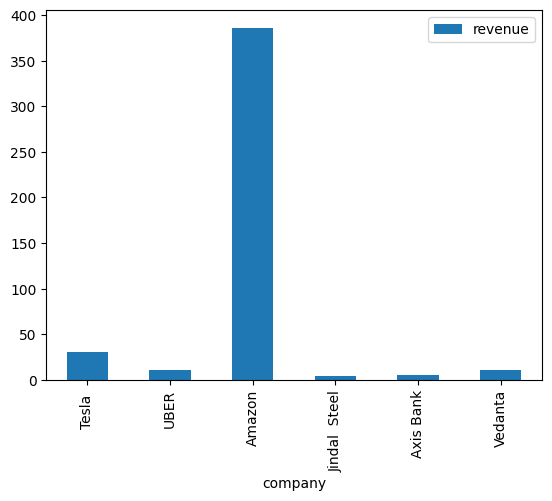

In [26]:
df.plot(x='company', y='revenue', kind='bar')

<Axes: xlabel='company'>

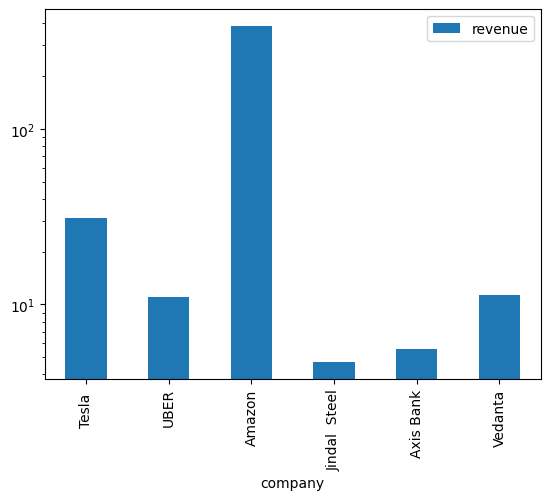

In [27]:
df.plot(x='company', y='revenue', kind='bar', logy=True)

Normal Distribution and Z Score

In [28]:
import seaborn as sn

In [29]:
df = pd.read_csv("heights.csv")
df.head()

,gender,height
0,Male,73.847017
1,Male,68.781904
2,Male,74.110105
3,Male,71.730978
4,Male,69.881796


In [30]:
df.shape

(10000, 2)

In [31]:
df.gender.describe()

count     10000
unique        2
top        Male
freq       5000
Name: gender, dtype: object

In [32]:
df.height.describe()

count    10000.000000
mean        66.367560
std          3.847528
min         54.263133
25%         63.505620
50%         66.318070
75%         69.174262
max         78.998742
Name: height, dtype: float64

<Axes: xlabel='height', ylabel='Count'>

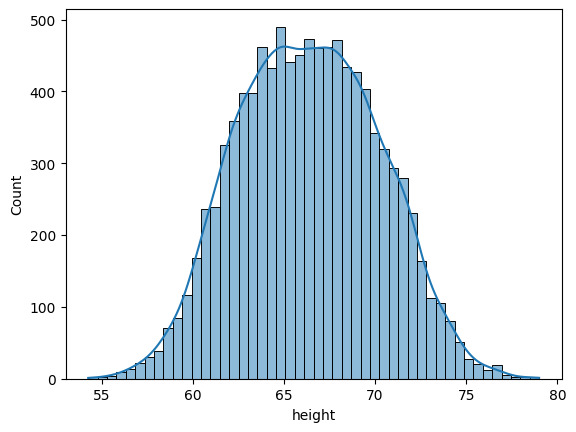

In [33]:
sn.histplot(df.height, kde=True)

In [34]:
mean = df.height.mean()
mean

66.367559754866

In [35]:
std = df.height.std()
std

3.847528120795573

In [36]:
min = mean - 3*std
min

54.824975392479274

In [37]:
max = mean + 3*std
max

77.91014411725271

In [38]:
#df[df.height > max]
df[(df.height < min)|(df.height > max)]

,gender,height
994,Male,78.095867
1317,Male,78.462053
2014,Male,78.998742
3285,Male,78.528210
3757,Male,78.621374
6624,Female,54.616858
9285,Female,54.263133


In [39]:
df_no_outlier = df[(df.height < 77.91) & (df.height > 54.82)]
df_no_outlier.shape

(9993, 2)

In [40]:
df.head(6)

,gender,height
0,Male,73.847017
1,Male,68.781904
2,Male,74.110105
3,Male,71.730978
4,Male,69.881796
5,Male,67.253016


In [41]:
df["zscore"] = (df.height - df.height.mean() / df.height.std())
df.head()

,gender,height,zscore
0,Male,73.847017,56.597615
1,Male,68.781904,51.532502
2,Male,74.110105,56.860703
3,Male,71.730978,54.481576
4,Male,69.881796,52.632394


df[(df.zscore<-3)|(df.zscore>3)]

### Exercise (Normal Distribution and Z Score for Outlier Removal) ###
You are given bhp.csv which contains property prices in the city of banglore, India. You need to examine price_per_sqft column and do following,

**1- Remove outliers using percentile technique first. Use [0.001, 0.999] for lower and upper bound percentiles.
2- After removing outliers in step 1, you get a new dataframe.
3- On step(2) dataframe, use 4 standard deviation to remove outliers
4- Plot histogram for new dataframe that is generated after step (3). Also plot bell curve on same histogram
5- On step(2) dataframe, use zscore of 4 to remove outliers. This is quite similar to step (3) and you will get exact same result**

In [42]:
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

In [43]:
df = pd.read_csv("bhp.csv")
df.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250


In [44]:
df.price_per_sqft.describe()

count    1.320000e+04
mean     7.920337e+03
std      1.067272e+05
min      2.670000e+02
25%      4.267000e+03
50%      5.438000e+03
75%      7.317000e+03
max      1.200000e+07
Name: price_per_sqft, dtype: float64

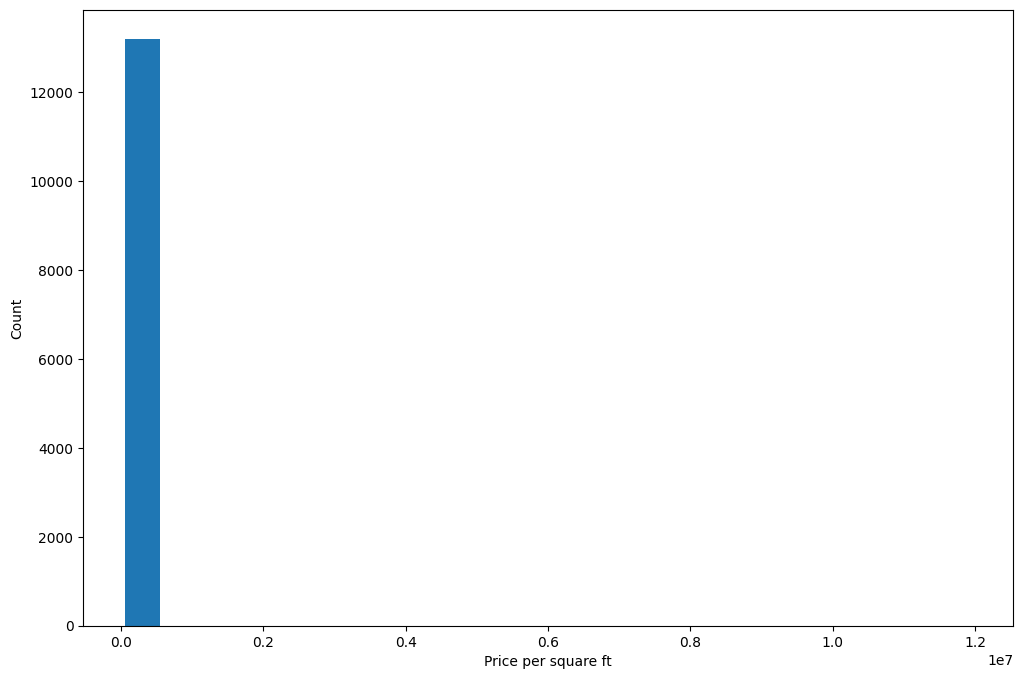

In [45]:
plt.hist(df.price_per_sqft, bins=20, rwidth=0.8)
plt.xlabel('Price per square ft')
plt.ylabel('Count')
plt.show()

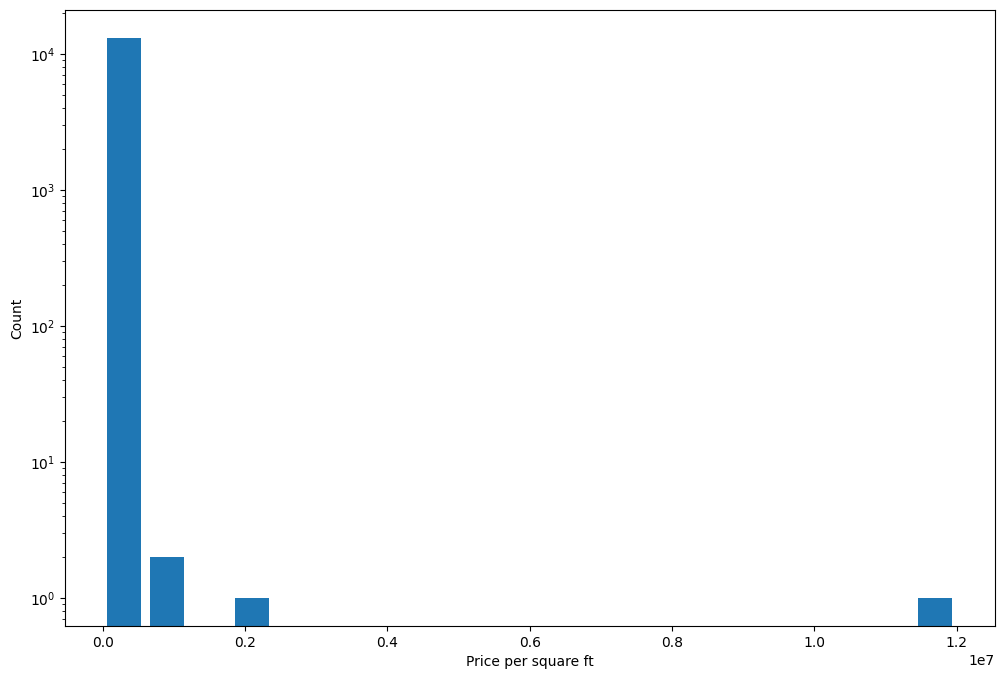

In [46]:
plt.hist(df.price_per_sqft, bins=20, rwidth=0.8)
plt.xlabel('Price per square ft')
plt.ylabel('Count')
plt.yscale('log')
plt.show()

In [47]:
lower_limit, upper_limit = df.price_per_sqft.quantile([0.001, 0.999])
lower_limit, upper_limit

(1366.184, 50959.36200000098)

In [48]:
outliers = df[(df.price_per_sqft > upper_limit) | (df.price_per_sqft < lower_limit)]
outliers.sample(10)

,location,size,total_sqft,bath,price,bhk,price_per_sqft
8300,Kengeri,1 BHK,1200.0,1.0,14.0,1,1166
7012,other,1 BHK,650.0,1.0,500.0,1,76923
6356,Bommenahalli,4 Bedroom,2940.0,3.0,2250.0,4,76530
4924,other,7 BHK,5.0,7.0,115.0,7,2300000
12328,other,4 Bedroom,4350.0,8.0,2600.0,4,59770
345,other,3 Bedroom,11.0,3.0,74.0,3,672727
5343,other,9 BHK,42000.0,8.0,175.0,9,416
5597,JP Nagar,2 BHK,1100.0,1.0,15.0,2,1363
7575,other,1 BHK,425.0,1.0,750.0,1,176470
1106,other,5 Bedroom,24.0,2.0,150.0,5,625000


In [49]:
df_new = df[(df.price_per_sqft<upper_limit) & (df.price_per_sqft>lower_limit)]
df_new.shape

(13172, 7)

In [50]:
df.shape

(13200, 7)

In [51]:
df.shape[0] - df_new.shape[0]

28

(2) Now remove outliers using 4 standard deviation

In [52]:
max_limit = df_new.price_per_sqft.mean() + 4*df_new.price_per_sqft.std()
min_limit = df_new.price_per_sqft.mean() - 4*df_new.price_per_sqft.std()
max_limit, min_limit

(23227.73653589429, -9900.429065502549)

In [53]:
df_new[(df_new.price_per_sqft>max_limit) | (df_new.price_per_sqft<min_limit)].sample(10)

,location,size,total_sqft,bath,price,bhk,price_per_sqft
3873,other,5 Bedroom,1250.00,5.0,300.0,5,24000
3136,other,4 Bedroom,1200.00,4.0,350.0,4,29166
7561,KR Puram,8 Bedroom,1500.00,7.0,382.0,8,25466
5654,other,4 Bedroom,4920.00,5.0,1150.0,4,23373
9791,other,4 Bedroom,1200.00,5.0,325.0,4,27083
8595,other,3 Bedroom,1200.00,2.0,300.0,3,25000
3605,other,4 Bedroom,2700.00,6.0,675.0,4,25000
5639,other,3 BHK,2777.29,5.0,650.0,3,23404
1548,Uttarahalli,5 Bedroom,400.00,5.0,200.0,5,50000
3144,other,5 BHK,8321.00,5.0,2700.0,5,32448


In [58]:
df_updated = df_new[(df_new.price_per_sqft> min_limit) & (df_new.price_per_sqft < max_limit)]
df_updated.shape

(13047, 7)

In [59]:
df_new.shape[0] - df_updated.shape[0]

125

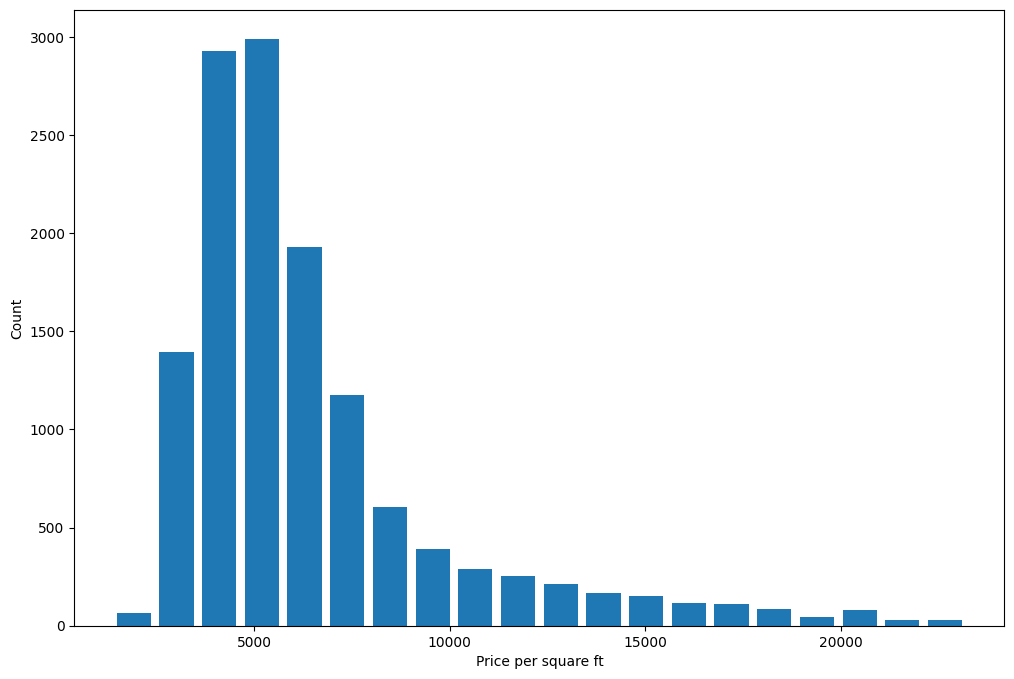

In [60]:
plt.hist(df_updated.price_per_sqft, bins=20, rwidth=0.8)
plt.xlabel('Price per square ft')
plt.ylabel('Count')
plt.show()

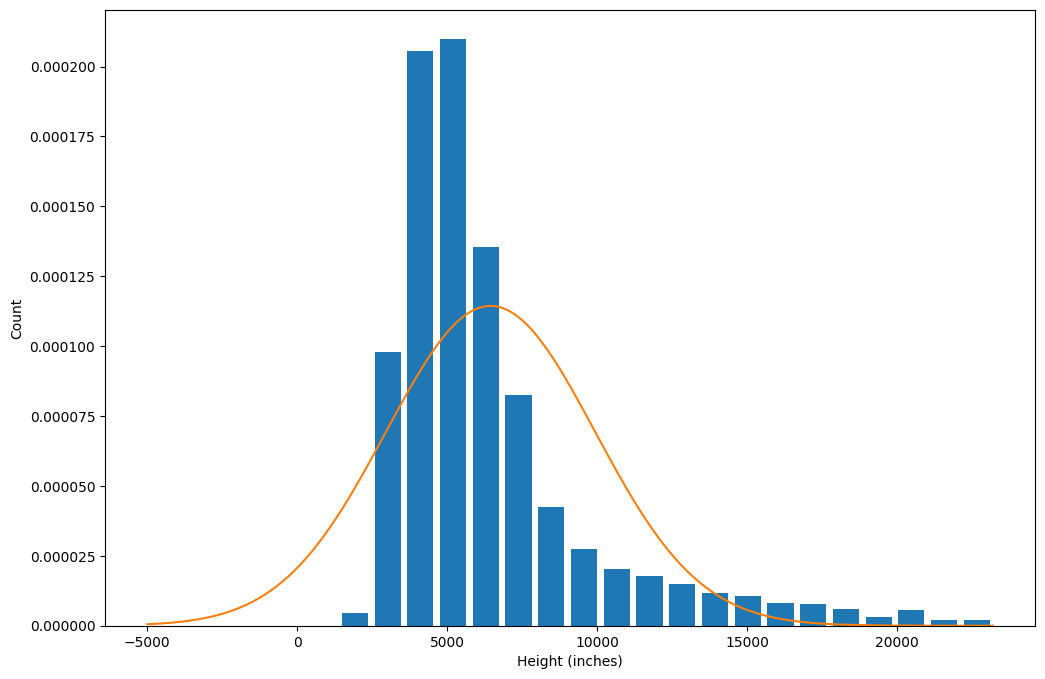

In [62]:
from scipy.stats import norm

plt.hist(df_updated.price_per_sqft, bins=20, rwidth=0.8, density=True)
plt.xlabel('Height (inches)')
plt.ylabel('Count')

rng = np.arange(-5000, df_updated.price_per_sqft.max(), 100)
plt.plot(rng, norm.pdf(rng,df_updated.price_per_sqft.mean(),df_updated.price_per_sqft.std()))

(3) Now remove outliers using z score. Use z score of 4 as your thresold

In [63]:
df_new['zscore'] = (df_new.price_per_sqft-df_new.price_per_sqft.mean())/df_new.price_per_sqft.std()
df_new.sample(10)

C:\Users\Al hamad\AppData\Local\Temp\ipykernel_4584\1867766138.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['zscore'] = (df_new.price_per_sqft-df_new.price_per_sqft.mean())/df_new.price_per_sqft.std()


,location,size,total_sqft,bath,price,bhk,price_per_sqft,zscore
12344,Ramamurthy Nagar,4 Bedroom,886.0,4.0,120.00,4,13544,1.661510
249,7th Phase JP Nagar,2 BHK,1270.0,2.0,93.00,2,7322,0.158982
7616,other,3 Bedroom,1500.0,3.0,90.00,3,6000,-0.160263
4145,Banashankari,3 BHK,1400.0,2.0,78.00,3,5571,-0.263861
1739,Hebbal,2 BHK,1100.0,2.0,50.00,2,4545,-0.511626
340,7th Phase JP Nagar,3 BHK,1850.0,3.0,150.00,3,8108,0.348790
7760,Raja Rajeshwari Nagar,3 BHK,1693.0,3.0,71.38,3,4216,-0.591075
11621,CV Raman Nagar,3 BHK,1980.0,4.0,166.00,3,8383,0.415199
3695,Sarjapur Road,4 BHK,3785.0,6.0,280.00,4,7397,0.177093
9065,Yelahanka,2 BHK,1023.0,2.0,52.59,2,5140,-0.367942


In [64]:
outliers_z = df_new[(df_new.zscore < -4) | (df_new.zscore>4)]
outliers_z.shape

(125, 8)

In [65]:
outliers_z.sample(5)

,location,size,total_sqft,bath,price,bhk,price_per_sqft,zscore
9,other,6 Bedroom,1020.00,6.0,370.0,6,36274,7.150495
9853,Indira Nagar,5 Bedroom,2400.00,5.0,700.0,5,29166,5.434010
12640,other,3 BHK,2777.29,5.0,649.0,3,23368,4.033872
3488,Banashankari Stage III,8 Bedroom,1200.00,7.0,350.0,8,29166,5.434010
13078,other,4 Bedroom,9200.00,4.0,2600.0,4,28260,5.215223


In [67]:
df4 = df_new[(df_new.zscore>-4)&(df_new.zscore<4)]
df4.shape

(13047, 8)

In [68]:
df_new.shape[0] - df4.shape[0]

125

In this step also we removed 125 outliers. The result would be exactly same as 4 standard deviation